In [34]:
import pandas as pd
import numpy as np

In [35]:
# dataset_dir = r"C:\Users\IdeaPad\Documents\ML\American-Sign-Language-Recognition-master\American-Sign-Language-Recognition-master\DATASET"
df_train=pd.read_csv("bisindo_dataset_train_2data.csv")
df_test=pd.read_csv("bisindo_dataset_test_2data.csv")
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()
df_train.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,165,179,177,179,182,185,186,184,178,191,...,144,139,135,132,130,117,126,125,124,123
1,217,219,220,221,221,223,224,223,224,224,...,188,187,181,104,98,107,108,106,168,182
2,159,160,161,162,163,164,165,166,167,168,...,155,155,155,158,109,82,98,110,123,152
3,128,129,130,132,133,134,135,136,137,138,...,124,124,125,129,80,52,66,78,91,121
4,158,171,169,172,179,181,181,182,178,193,...,140,135,131,129,127,114,123,122,121,124


In [36]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [37]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [38]:
print(x_train.shape)
print(x_test.shape)

(11763, 28, 28, 1)
(3000, 28, 28, 1)


In [39]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [40]:
print(y_train)
print(y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


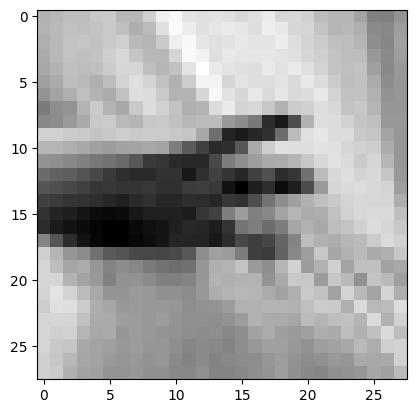

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_train[58].reshape(28,28),cmap='gray')

In [42]:
x_train=x_train/255
x_test=x_test/255

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [44]:
batch_size = 128
num_classes = 27
epochs = 100


In [45]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

C:\Users\IdeaPad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [47]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.0360 - loss: 3.2882 - val_accuracy: 0.1133 - val_loss: 3.2371
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.1128 - loss: 3.1101 - val_accuracy: 0.4453 - val_loss: 2.2865
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3744 - loss: 2.2151 - val_accuracy: 0.6043 - val_loss: 1.6848
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5360 - loss: 1.6947 - val_accuracy: 0.6320 - val_loss: 1.5076
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5970 - loss: 1.4642 - val_accuracy: 0.6577 - val_loss: 1.3887
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6205 - loss: 1.3450 - val_accuracy: 0.6653 - val_loss: 1.3489
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6675 - loss: 1.2137 - val_accuracy: 0.6877 - val_loss: 1.3019
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6774 - loss: 1.1826 - val_accuracy: 0.

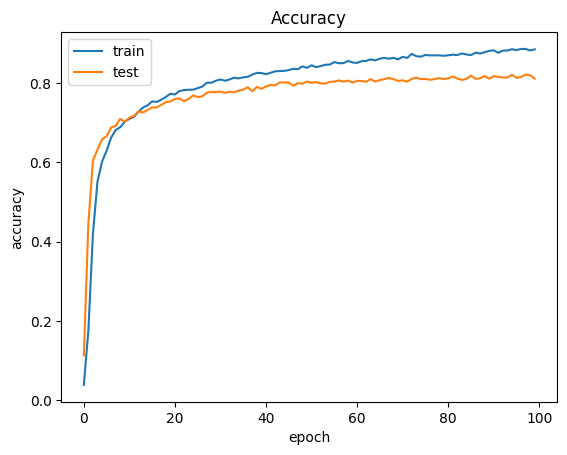

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [49]:
model.save('sign_language.keras')

In [50]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y', 'Z', '-']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [51]:
classify(x_train[3]*255)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


'A'

In [52]:
print(y_train[3])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
